In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from imblearn.combine import SMOTEENN
import sys
sys.path.append('/home/coolshan/Project/Efficient-Pytorch-Template')
from efficient.ml_model import *
from efficient.utils import *
from efficient.eval_utils import *

data_df = pd.read_excel('data/train.xlsx')
test_df = pd.read_excel('data/test.xlsx')
submission_df = pd.read_csv('data/submission.csv')

In [2]:
data = data_df.values[:,:-1]
label=data_df.values[:,-1]
qt = QuantileTransformer(n_quantiles=100)
data = qt.fit_transform(data)

In [3]:
# split 9:1 
train_data, train_label, test_data, test_label = KFold_Sampler(data,label,n_splits=100).get_multi_fold_data(n_fold=10)
print(len(train_data),len(test_data),len(test_data)/(len(train_data)+len(test_data)))

# define model list
model_lgb = lgb.LGBMClassifier(is_unbalance=True)

model_dict = {'RF_3':RandomForestClassifier(n_estimators=310,max_depth=3),
              'RF_depth_None':RandomForestClassifier(n_estimators=310),
              'XGB_31_3':XGBClassifier(n_estimators=31,max_depth=3),
              'XGB_310_3':XGBClassifier(n_estimators=31,max_depth=3),
              'XGB_31':XGBClassifier(n_estimators=31),
              'XGB_310':XGBClassifier(n_estimators=310),
              'SVM':SVC(probability=True),
              'SVM_lin':SVC(kernel='linear',probability=True),
              'SVM_rbf':SVC(kernel='rbf',probability=True),
              'SVM_0.2':SVC(C=0.2,probability=True),
              'SVM_0.2_lin':SVC(C=0.2,kernel='linear',probability=True),
              'SVM_0.2_poly':SVC(C=0.2,kernel='poly',probability=True),
              'SVM_5':SVC(C=5,probability=True),
              'SVM_5_lin':SVC(C=5,kernel='linear',probability=True),
              'SVM_5_poly':SVC(C=5,kernel='poly',probability=True),
              # 'KNN_Cls':KNeighborsClassifier(),
              'LGB_Cls':model_lgb,
              # 'Ridge_Cls':RidgeClassifier(),
              # 'MLP_Cls':MLPClassifier(activation = "relu", alpha = 0.001, hidden_layer_sizes = (56,10),
              #               learning_rate = "constant", max_iter = 3000, random_state = 3000,early_stopping=True),
              # 'QDA':QuadraticDiscriminantAnalysis(),
              }
#stack_model=MLPClassifier(activation = "relu", alpha = 0.0001,validation_fraction=0.1, hidden_layer_sizes = (38),learning_rate = "constant", max_iter = 3000, random_state = 1000,early_stopping=True)
# stack_model=SVC(C=1,kernel='linear', probability=True)
stack_model = ML_Weighted_Model(len(model_dict),2,lr=5e-4,epoch=1000,init_mode='rand')
#stack_model = DecisionTreeClassifier()
model = Stack_Ensemble_Proba_Model(model_dict=model_dict, stack_model=copy.deepcopy(stack_model), stack_training_split=0.5)
# model = Mean_Ensemble_Proba_Model(copy.deepcopy(model_dict))
cv_model, cv_df = model.cross_validation_evaluate(train_data, train_label, accuracy_score,n_splits=5)

3510 393 0.10069177555726365




====== CV:0 ======
             model  eval_metric
0             RF_3     0.675214
1          SVM_lin     0.680912
2      SVM_0.2_lin     0.683761
3        SVM_5_lin     0.688034
4          SVM_0.2     0.702279
5          LGB_Cls     0.703704
6           XGB_31     0.710826
7       SVM_5_poly     0.710826
8    RF_depth_None     0.713675
9          XGB_310     0.713675
10        XGB_31_3     0.719373
11       XGB_310_3     0.719373
12    SVM_0.2_poly     0.720798
13  Ensemble Model     0.727920
14             SVM     0.729345
15         SVM_rbf     0.732194
16           SVM_5     0.739316




====== CV:1 ======
             model  eval_metric
0             RF_3     0.682336
1        SVM_5_lin     0.682336
2      SVM_0.2_lin     0.683761
3          SVM_0.2     0.683761
4            SVM_5     0.688034
5       SVM_5_poly     0.689459
6          SVM_lin     0.689459
7     SVM_0.2_poly     0.693732
8          LGB_Cls     0.693732
9          SVM_rbf     0.695157
10         XGB_310     0.699430
11          XGB_31     0.699430
12       XGB_310_3     0.699430
13        XGB_31_3     0.699430
14             SVM     0.699430
15  Ensemble Model     0.717949
16   RF_depth_None     0.725071




====== CV:2 ======
             model  eval_metric
0      SVM_0.2_lin     0.655271
1          SVM_lin     0.665242
2          SVM_0.2     0.668091
3             RF_3     0.669516
4        SVM_5_lin     0.669516
5          LGB_Cls     0.679487
6         XGB_31_3     0.682336
7        XGB_310_3     0.682336
8       SVM_5_poly     0.688034
9          XGB_310     0.690883
10   RF_depth_None     0.692308
11         SVM_rbf     0.693732
12             SVM     0.693732
13          XGB_31     0.698006
14  Ensemble Model     0.698006
15           SVM_5     0.702279
16    SVM_0.2_poly     0.706553




====== CV:3 ======
             model  eval_metric
0          LGB_Cls     0.670940
1             RF_3     0.672365
2          SVM_lin     0.676638
3        SVM_5_lin     0.678063
4      SVM_0.2_lin     0.678063
5         XGB_31_3     0.680912
6        XGB_310_3     0.680912
7          SVM_0.2     0.680912
8           XGB_31     0.695157
9     SVM_0.2_poly     0.695157
10      SVM_5_poly     0.696581
11         XGB_310     0.698006
12         SVM_rbf     0.705128
13             SVM     0.707977
14   RF_depth_None     0.707977
15           SVM_5     0.716524
16  Ensemble Model     0.717949




====== CV:4 ======
             model  eval_metric
0             RF_3     0.676638
1          SVM_0.2     0.682336
2      SVM_0.2_lin     0.686610
3              SVM     0.696581
4          SVM_lin     0.698006
5          SVM_rbf     0.698006
6        SVM_5_lin     0.702279
7            SVM_5     0.706553
8          LGB_Cls     0.709402
9        XGB_310_3     0.715100
10        XGB_31_3     0.715100
11    SVM_0.2_poly     0.715100
12      SVM_5_poly     0.715100
13          XGB_31     0.723647
14         XGB_310     0.730769
15  Ensemble Model     0.733618
16   RF_depth_None     0.743590

====== CV Mean ======
             model  eval_metric
0             RF_3     0.675214
1      SVM_0.2_lin     0.677493
2          SVM_lin     0.682051
3          SVM_0.2     0.683476
4        SVM_5_lin     0.684046
5          LGB_Cls     0.691453
6         XGB_31_3     0.699430
7        XGB_310_3     0.699430
8       SVM_5_poly     0.700000
9          SVM_rbf     0.704843
10             SVM     0.705

array([0.43456507, 1.1607339 , 1.4977169 , 1.6781008 , 1.2859726 ,
       1.3690934 , 0.4346665 , 0.44192412, 0.10168947, 0.5299678 ,
       0.5670927 , 0.7986287 , 0.89054555, 0.29725587, 0.7846541 ,
       1.2726593 ], dtype=float32)

['RF_3',
 'RF_depth_None',
 'XGB_31_3',
 'XGB_310_3',
 'XGB_31',
 'XGB_310',
 'SVM',
 'SVM_lin',
 'SVM_rbf',
 'SVM_0.2',
 'SVM_0.2_lin',
 'SVM_0.2_poly',
 'SVM_5',
 'SVM_5_lin',
 'SVM_5_poly',
 'LGB_Cls']

array([[0.17, 0.7 ],
       [1.44, 0.88],
       [1.55, 1.45],
       [1.69, 1.67],
       [1.23, 1.34],
       [1.27, 1.47],
       [0.52, 0.35],
       [0.84, 0.05],
       [0.01, 0.19],
       [0.37, 0.69],
       [0.25, 0.88],
       [0.84, 0.75],
       [0.76, 1.02],
       [0.01, 0.58],
       [0.72, 0.85],
       [1.32, 1.23]], dtype=float32)

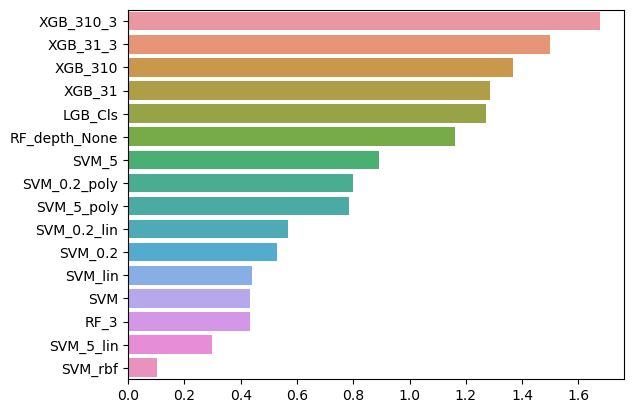

In [4]:
weights = cv_model[0].stack_model.weights.data.detach().numpy()
for i in range(1,len(cv_model)):
  weights = np.add(cv_model[i].stack_model.weights.data.detach().numpy(),weights)

weights = weights/len(cv_model)
importance = np.array(weights.mean(axis=1))
model_name = list(model_dict.keys())
display(importance,model_name)
display(np.round(weights,decimals=2))
zipped = list(zip(model_name,importance))
sorted_zipped = sorted(zipped, key=lambda x: x[1])[::-1]
model_name, importance = zip(*sorted_zipped)
importance = np.array(importance)
sns.barplot(y=list(model_name),x=importance)
plt.show()

In [5]:
stack_model.weights

Parameter containing:
tensor([[0.7161, 1.2478],
        [1.2008, 0.5445],
        [1.3222, 1.1157],
        [1.4600, 1.3406],
        [0.7732, 0.8726],
        [0.7848, 0.9823],
        [1.1876, 1.0581],
        [1.4001, 0.6050],
        [0.6562, 0.9027],
        [0.9425, 1.2592],
        [0.8108, 1.4432],
        [1.4380, 1.3487],
        [1.2685, 1.2695],
        [0.5771, 1.1420],
        [1.3159, 1.4561],
        [0.8496, 0.7529]], requires_grad=True)

In [17]:
stack_model = ML_Weighted_Model(5,2,epoch=100,init_mode='rand')
#stack_model = DecisionTreeClassifier()
cv_ensemble_model = Stack_Ensemble_Proba_Model(model_dict=cv_model, stack_model=copy.deepcopy(stack_model), stack_training_split=0.15)
# cv_ensemble_model = Mean_Ensemble_Proba_Model(cv_model)
# model.fit(train_data,train_label)
# # cv_ensemble_model.fit(train_data,train_label)
# print('========== Ensemble Model ==========')
# _=model.evaluate(test_data,test_label,evaluation_fn=accuracy_score,verbose=True)
print('========== CV Ensemble Model ==========')
_=cv_ensemble_model.evaluate(test_data,test_label,evaluation_fn=accuracy_score,verbose=True)

========== CV Ensemble Model ==========
            model  eval_metric
0         model_4     0.699746
1         model_1     0.702290
2         model_2     0.715013
3         model_5     0.727735
4         model_3     0.732824
5  Ensemble Model     0.743003


In [25]:
stack_model.weights

Parameter containing:
tensor([[0.5523, 0.5588],
        [0.1769, 0.4497],
        [0.6498, 0.3951],
        [0.6170, 0.9557],
        [0.4138, 0.6248]], requires_grad=True)

In [5]:
test_data = test_df.values[:,1:]
test_data = qt.transform(test_data)
test_pred = model.predict(test_data)
test_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [6]:
import torch